In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import tensorflow as tf
from sklearn import preprocessing
from tensorflow import keras
from keras.layers import Conv2D, Input, MaxPool2D,Flatten, Dense, Permute, GlobalAveragePooling2D
from keras.models import Model
from sklearn.model_selection import GridSearchCV, KFold
from scikeras.wrappers import KerasClassifier,KerasRegressor
from keras.layers import Dropout
from keras.optimizers.legacy import Adam

import warnings
warnings.filterwarnings('ignore')

In [2]:
gas=pd.read_csv('gas_turbines.csv')
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
gas.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
gas.shape

(15039, 11)

In [5]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
gas.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [7]:
gas.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [8]:
#checking for null values
gas.isna().sum() # no null values

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [9]:
#check for duplicated values
gas[gas.duplicated] # no duplicated values

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


<Figure size 1000x1200 with 0 Axes>

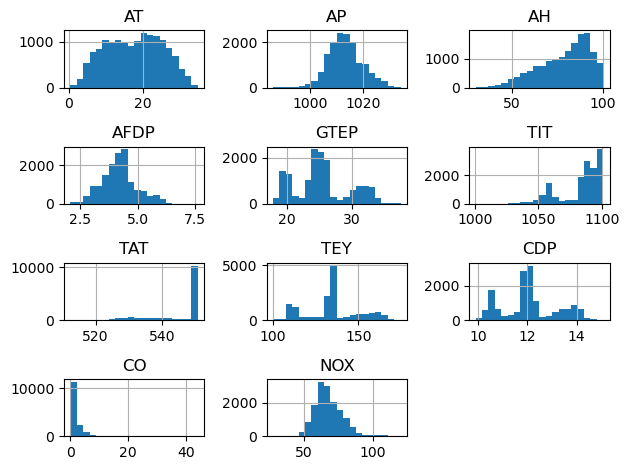

<Figure size 1000x1200 with 0 Axes>

In [10]:
gas.hist(bins=20)
plt.tight_layout()
plt.figure(figsize=(10,12))

In [11]:
#correaltion analysis
gas.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


<Axes: >

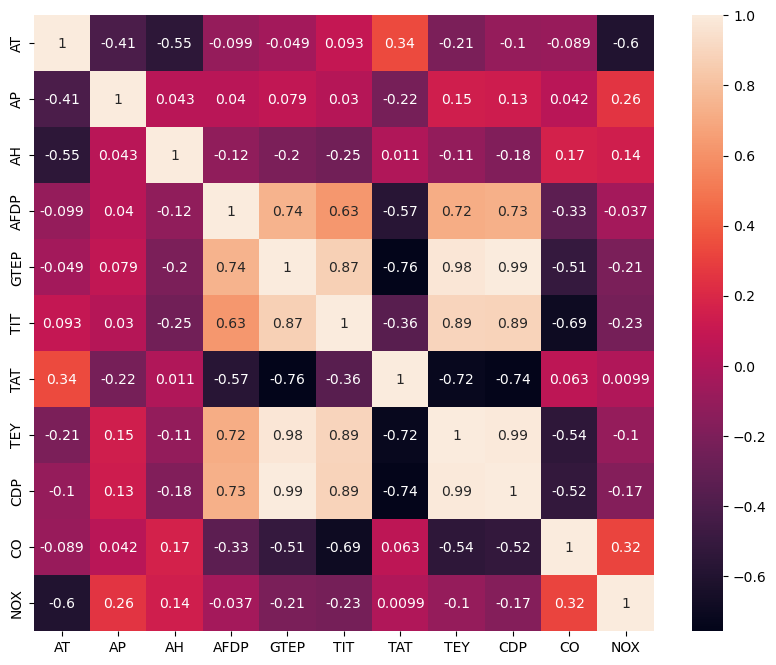

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(gas.corr(),annot=True)

In [13]:
#ambient variables

gas1=gas.drop(columns=['AFDP','GTEP','TAT','CO','NOX'],axis=1)
gas1.head()

,AT,AP,AH,TIT,TEY,CDP
0,6.8594,1007.9,96.799,1059.2,114.70,10.605
1,6.7850,1008.4,97.118,1059.3,114.72,10.598
2,6.8977,1008.8,95.939,1059.4,114.71,10.601
3,7.0569,1009.2,95.249,1059.6,114.72,10.606
4,7.3978,1009.7,95.150,1059.7,114.72,10.612


In [14]:
gas1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TIT     15039 non-null  float64
 4   TEY     15039 non-null  float64
 5   CDP     15039 non-null  float64
dtypes: float64(6)
memory usage: 705.1 KB


In [15]:
gas1.columns

Index(['AT', 'AP', 'AH', 'TIT', 'TEY', 'CDP'], dtype='object')

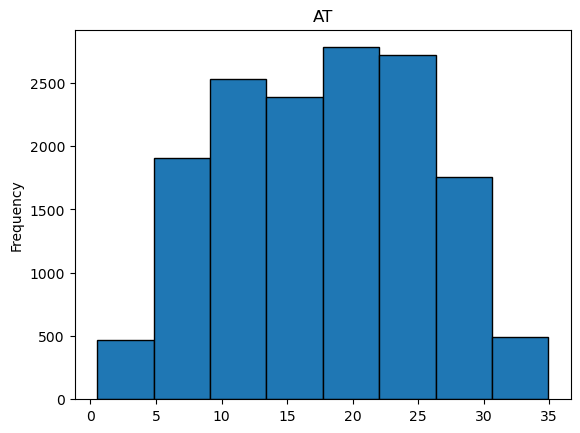

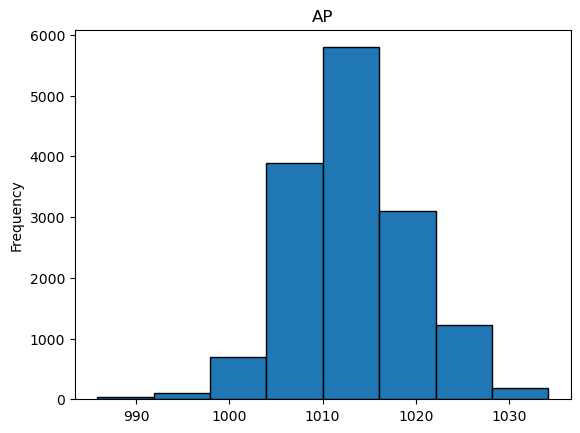

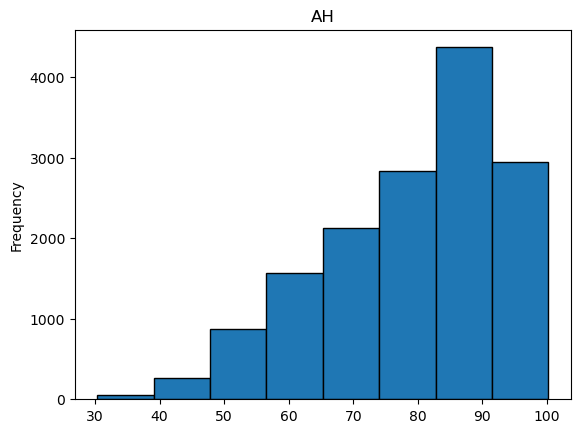

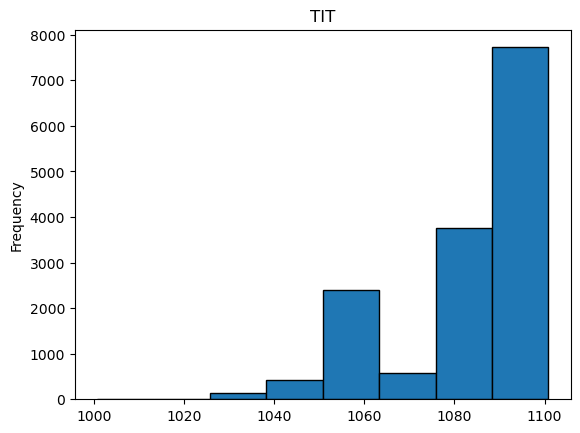

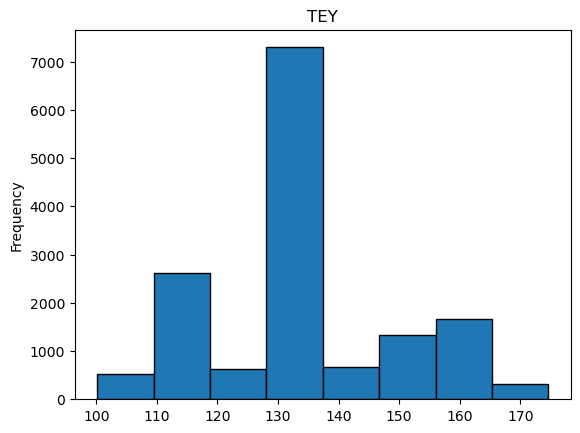

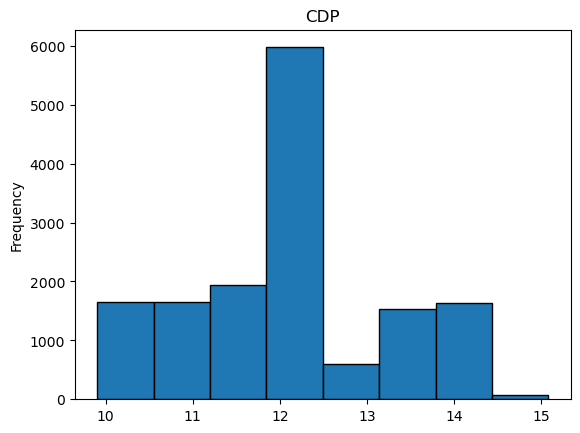

In [16]:
for colunms in gas1:
    gas1[colunms].plot.hist(bins=8,edgecolor='black')
    plt.title(colunms)
    plt.show()

In [17]:
x=gas1.drop(columns=['TEY'])
x

,AT,AP,AH,TIT,CDP
0,6.8594,1007.9,96.799,1059.2,10.605
1,6.7850,1008.4,97.118,1059.3,10.598
2,6.8977,1008.8,95.939,1059.4,10.601
3,7.0569,1009.2,95.249,1059.6,10.606
4,7.3978,1009.7,95.150,1059.7,10.612
...,...,...,...,...,...
15034,9.0301,1005.6,98.460,1049.7,10.400
15035,7.8879,1005.9,99.093,1046.3,10.433
15036,7.2647,1006.3,99.496,1037.7,10.483
15037,7.0060,1006.8,99.008,1043.2,10.533


In [18]:
y=gas1[['TEY']]
y

,TEY
0,114.70
1,114.72
2,114.71
3,114.72
4,114.72
...,...
15034,111.61
15035,111.78
15036,110.19
15037,110.74


In [19]:
# perform feature engineering
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [20]:
x=mm.fit_transform(x)
y=mm.fit_transform(y)
x

array([[0.18418215, 0.45604964, 0.95131413, 0.584     , 0.1353398 ],
       [0.18201978, 0.4663909 , 0.95588067, 0.585     , 0.13398756],
       [0.18529531, 0.47466391, 0.93900309, 0.586     , 0.13456709],
       ...,
       [0.19596183, 0.4229576 , 0.98992213, 0.369     , 0.11177221],
       [0.18844295, 0.43329886, 0.98293633, 0.424     , 0.12143106],
       [0.18617304, 0.44157187, 0.96182146, 0.491     , 0.1310899 ]])

In [21]:
# train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=40)

In [22]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(12031, 5)
(3008, 5)
(12031, 1)
(3008, 1)


## Model Building

In [23]:
import keras 
from keras.layers import Dense

In [24]:
model=keras.models.Sequential()
model.add(Dense(units=50,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=20,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=1,activation='linear'))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse','mae'])
model.fit(xtrain,ytrain,batch_size=120,epochs=100)



Epoch 1/100


101/101 [==============================] - 3s 4ms/step - loss: 0.0603 - mse: 0.0603 - mae: 0.1781
Epoch 2/100
101/101 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0236
Epoch 3/100
101/101 [==============================] - 0s 3ms/step - loss: 2.2711e-04 - mse: 2.2711e-04 - mae: 0.0116
Epoch 4/100
101/101 [==============================] - 0s 4ms/step - loss: 1.8689e-04 - mse: 1.8689e-04 - mae: 0.0106
Epoch 5/100
101/101 [==============================] - 0s 3ms/step - loss: 1.7686e-04 - mse: 1.7686e-04 - mae: 0.0103
Epoch 6/100
101/101 [==============================] - 0s 4ms/step - loss: 1.7368e-04 - mse: 1.7368e-04 - mae: 0.0102
Epoch 7/100
101/101 [==============================] - 0s 4ms/step - loss: 1.7471e-04 - mse: 1.7471e-04 - mae: 0.0102
Epoch 8/100
101/101 [==============================] - 0s 3ms/step - loss: 1.7774e-04 - mse: 1.7774e-04 - mae: 0.0104
Epoch 9/100
101/101 [==============================] - 0s 4ms/step -

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                300       
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1341 (5.24 KB)
Trainable params: 1341 (5.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
ytest

array([[0.45150457],
       [0.90596454],
       [0.45231059],
       ...,
       [0.14239656],
       [0.1277539 ],
       [0.8308705 ]])

In [27]:
ypred=model.predict(xtest)
ypred

94/94 [==============================] - 0s 3ms/step


array([[0.43639225],
       [0.9006829 ],
       [0.43634677],
       ...,
       [0.12426756],
       [0.13881513],
       [0.80785185]], dtype=float32)

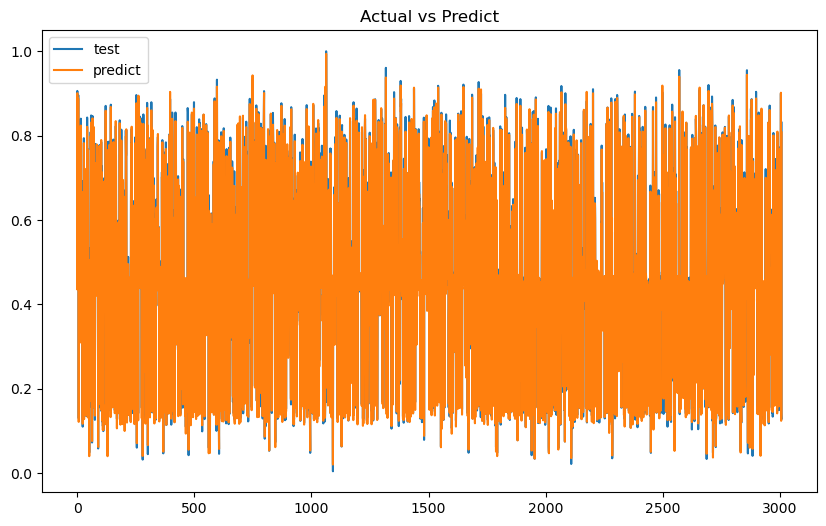

In [28]:
plt.figure(figsize=(10,6))
plt.plot(ytest)
plt.plot(ypred)
plt.legend(['test','predict'])
plt.title('Actual vs Predict')
plt.show()

In [29]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error

In [30]:
mean_absolute_error(ytest,ypred)

0.009626201987679767

In [31]:
mean_squared_error(ytest,ypred)

0.00015811268179061335

In [ ]:
#!pip install --user tensorflow==2.15


In [32]:
model.history.history

{}

In [33]:
loss=pd.DataFrame(model.history.history)
loss

""


# Thank you